Evaluation Matrix for Text data.

In [ ]:
!pip install -q transformers datasets rouge-score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 35.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 15.9 MB/s eta 0:00:00


In [ ]:
#install spacy large language model. (Colab needs to be restarted/)
!python -m spacy download en_core_web_lg
     

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-11 04:37:01.650004: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


Importing  all the required libraries.

In [ ]:
import tensorflow_datasets as tfds 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
from tqdm.notebook import tqdm
  
import tensorflow_hub as hub
from tensorflow import keras 
import tensorflow as tf
from IPython.display import Image 
import matplotlib.pyplot as plt
import os
import glob

from sklearn.model_selection import train_test_split


nlp = spacy.load('en_core_web_lg')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Reading the dataset in text format.

In [ ]:
# Scisumm_ds = tfds.as_numpy(tfds.load(
#     'cnn_dailymail',
#     split='test',
#     batch_size=-1
# )) 

file1 = open("/content/drive/MyDrive/M_Tech_Project/Whole_text_data/A00-1031.txt","r")
print(file1.read())
print(type(file1.read()))
file1.close()


  TnT - A Statistical Part-Of-Speech Tagger
    Trigrams'n'Tags (TnT) is an efficient statistical part-of-speech tagger.Contrary to claims found elsewhere in the literature, we argue that a tagger based on Markov models performs at least as well as other current approaches, including the Maximum Entropy framework.A recent comparison has even shown that TnT performs significantly better for the tested corpora.We describe the basic model of TnT, the techniques used for smoothing and for handling unknown words.Furthermore, we present evaluations on two corpora.
    A large number of current language processing systems use a part-of-speech tagger for pre-processing.The tagger assigns a (unique or ambiguous) part-ofspeech tag to each token in the input and passes its output to the next processing level, usually a parser.Furthermore, there is a large interest in part-ofspeech tagging for corpus annotation projects, who create valuable linguistic resources by a combination of automatic proce

**Reading summary and  article data in same order.**

In [ ]:
summary_path = '/content/drive/MyDrive/M_Tech_Project/Summary_Data_new/'
article_path = '/content/drive/MyDrive/M_Tech_Project/Whole_text_data/'
summary_xml_files = glob.glob(summary_path+'/*')
for i in summary_xml_files:
  print(i)
  i = i.split(".")
  i=i[0]+"."+i[2]
  i = i.split("/")
  article_xml_files = glob.glob(article_path+i[-1])
  
  print(article_xml_files)

**Creating DataFrame of summary and whole text**

In [ ]:
Scisumm_ds = pd.DataFrame(columns = ['article', 'summary'])
l = []


summary_path = '/content/drive/MyDrive/M_Tech_Project/Summary_Data_new/'
article_path = '/content/drive/MyDrive/M_Tech_Project/Whole_text_data/'
summary_xml_files = glob.glob(summary_path+'/*')
for i in summary_xml_files:

  file1 = open(i,"r")
  l.append(file1.read())
  file1.close()


  # print(i)
  i = i.split(".")
  i=i[0]+"."+i[2]
  i = i.split("/")
  article_xml_files = glob.glob(article_path+i[-1])

  file2 = open(article_xml_files[0],"r")
  l.append(file2.read())
  file2.close()
  
  # print(article_xml_files[0])
  
  Scisumm_ds.loc[len(Scisumm_ds)] = l[::-1]
  l=[]

Scisumm_ds

,article,summary
0,\n TnT - A Statistical Part-Of-Speech Tagger\...,TnT - A Statistical Part-Of-Speech Tagger\nTri...
1,\n Using Semantic Preferences To Identify Ver...,Using Semantic Preferences To Identify Verbal ...
2,\n Termight: Identifying And Translating Tech...,Termight: Identifying And Translating Technica...
3,\n Trainable Methods For Surface Natural Lang...,Trainable Methods For Surface Natural Language...
4,\n A Maximum Entropy Approach To Identifying ...,A Maximum Entropy Approach To Identifying Sent...
...,...,...
983,\n Improved Alignment Models For Statistical ...,Improved Alignment Models For Statistical Mach...
984,\n Detecting Text Similarity Over Short Passa...,Detecting Text Similarity Over Short Passages:...
985,\n Exploiting Diversity In Natural Language P...,Exploiting Diversity In Natural Language Proce...
986,\n Language Independent Named Entity Recognit...,Language Independent Named Entity Recognition ...


In [ ]:
Scisumm_ds["summary"] = Scisumm_ds.summary.apply(lambda x: "".join(x.split("\n")) )
Scisumm_ds["article"] = Scisumm_ds.article.apply(lambda x: "".join(x.split("\n")) )

In [ ]:
(Scisumm_ds['article'][:2][1])

25322

In [ ]:
(Scisumm_ds['summary'][:10][9])

2719

In [ ]:
# cnn_df = pd.DataFrame(cnn_ds)
# cnn_df.highlights = cnn_df.highlights.apply(lambda x: x.decode('utf-8')) 
# cnn_df["summary"] = cnn_df.highlights.apply(lambda x: "".join(x.split("\n")) ) 
# cnn_df.article = cnn_df.article.apply(lambda x: x.decode('utf-8')) 
# cnn_df["art_sents"] = cnn_df.article.apply(lambda x: len([x for x in nlp(x).sents])) 
# cnn_df

**Scisummnet Dataset**

In [ ]:
X_train, X_test = train_test_split(Scisumm_ds, test_size=0.2)

# test_df =  pd.DataFrame(tfds.as_numpy(tfds.load( 'cnn_dailymail', split='test', batch_size=-1)))
# train_df = pd.DataFrame(tfds.as_numpy(tfds.load( 'cnn_dailymail', split='train', batch_size=-1)))

# test_df.highlights = test_df.highlights.apply(lambda x: x.decode('utf-8')) 
# train_df.highlights = train_df.highlights.apply(lambda x: x.decode('utf-8')) 

# test_df.article = test_df.article.apply(lambda x: x.decode('utf-8')) 
# train_df.article = train_df.article.apply(lambda x: x.decode('utf-8')) 

X_train.shape, X_test.shape

((790, 2), (198, 2))

In [ ]:
X_train[:5]

,article,summary
391,Parser Combination By Reparsing We presen...,Parser Combination By ReparsingWe present a no...
415,Unsupervised Modeling of Twitter Conversatio...,Unsupervised Modeling of Twitter Conversations...
30,Effects of Adjective Orientation and Gradabi...,Effects Of Adjective Orientation And Gradabili...
825,An Evaluation Exercise For Word Alignment ...,An Evaluation Exercise For Word AlignmentThis ...
428,Exploring Content Models for Multi-Document ...,Exploring Content Models for Multi-Document Su...


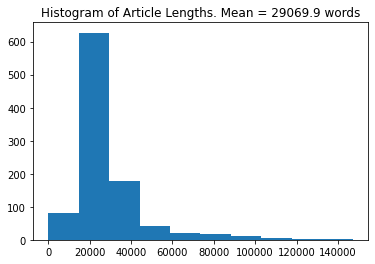

In [ ]:
art_lengths = [ len(x) for x in Scisumm_ds.article] 
plt.hist(art_lengths);
plt.title("Histogram of Article Lengths. Mean = " + str(round(sum(art_lengths)/ len(art_lengths),1)) + " words" );

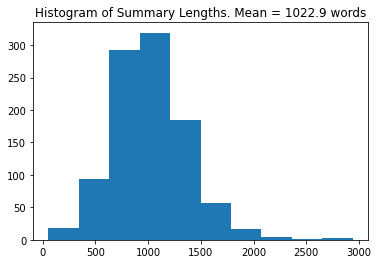

In [ ]:
sum_lengths = [ len(x) for x in Scisumm_ds.summary] 
plt.hist(sum_lengths);
plt.title("Histogram of Summary Lengths. Mean = " + str(round(sum(sum_lengths)/ len(sum_lengths),1)) + " words" );

In [ ]:
os.makedirs("data/", exist_ok=True) 
os.makedirs("data/test", exist_ok=True) 
os.makedirs("data/train", exist_ok=True) 

X_train.to_json("data/train/my_train.json")
X_test.to_json("data/test/my_test.json")

In [ ]:
def get_dicts(df, folder="test"):   
  sents_dict = {}
  doc_dict = { i: {"article": df.article[i], "summary": df.summary[i]} for i in df.index }
  raw_docs = [ doc_dict[k]["article"] for k in doc_dict.keys()]

  doc_sents = {}
  sents_list = []
  raw_sents = [] 
  i = 0
  min_sent_length = 14
  for k in tqdm(doc_dict.keys()):
    article = doc_dict[k]["article"]  
    summary = doc_dict[k]["summary"] 
    sents = nlp(article).sents
    doc_sent_ids = [] 
    for sent in sents:
      if (len(sent)) > min_sent_length:
        sents_dict[i] = {"docid":k, "text": str(sent)} 
        sents_list.append({"sentid":i, "docid":k, "text": str(sent) }) 
        raw_sents.append(str(sent))
        i += 1  
         
  return doc_dict, sents_list

test_doc_dict, test_sents_list = get_dicts(X_test)
train_doc_dict, train_sents_list = get_dicts(X_train)

  0%|          | 0/198 [00:00<?, ?it/s]

  0%|          | 0/790 [00:00<?, ?it/s]

In [ ]:
from rouge_score import rouge_scorer 
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

def get_rougue_score(text, summary, metric="rougeL"):
  max_score = 0
  for h_text in summary:
    score =  scorer.score(text, h_text)[metric].fmeasure
    # print(score, text, "\n \t" , h_text)
    if score > max_score:
      max_score = score 
  return max_score 


def get_label(sent, doc_dict,  score_threshold = 0.55):
  sent_id, doc_id, sentence = sent["sentid"], sent["docid"], sent["text"]  
  summary = doc_dict[doc_id]["summary"].split("\n")
  doc = doc_dict[doc_id]["article"]

  label_score = get_rougue_score(sentence, summary) 
  # Normalize label to 0/1 based on rogue score threshold
  label_score = 0 if label_score < score_threshold else 1 
  return (sentence, doc, label_score)
  
def sub_sample(sents_batch, doc_dict, neg_multiplier=2):
  # get labels 
  vals = [get_label(x, doc_dict)  for x in sents_batch] 

  # construct arrays of sentences, corresponding documents and labels  
  sents, docs, y = [], [], [] 
  for row in vals:
    sents.append(row[0])
    docs.append(row[1])
    y.append(row[2])
   

  # get balanced number of positive and negative
  sub_df = pd.DataFrame.from_dict({"sents":sents, "docs":docs, "y":y}) 
  pos_df = sub_df[sub_df.y == 1]
  neg_df = sub_df[sub_df.y == 0]

  print("Negative sample size:", len(neg_df))
  print("Positive sample size:", len(pos_df))

  sub_neg_df = neg_df.sample(len(pos_df)*neg_multiplier) 
  balanced_df = pos_df.append(sub_neg_df)
  
  return balanced_df


In [ ]:
train_bdf = sub_sample(train_sents_list, train_doc_dict)
test_bdf = sub_sample(test_sents_list, test_doc_dict)

train_bdf.to_json("data/train_bdf.json")
test_bdf.to_json("data/test_bdf.json")

!gsutil cp -r data $sum_dir

Negative sample size: 110269
Positive sample size: 88
Negative sample size: 28225
Positive sample size: 19
CommandException: Wrong number of arguments for "cp" command.


In [ ]:
#define a directory to save data 
sum_dir = "/content/drive/MyDrive/M_Tech_Project/extractivesummarization"
!gsutil cp -r data $sum_dir 

Copying file://data/train_bdf.json...
Copying file://data/test_bdf.json...
Copying file://data/train/my_train.json...
Copying file://data/test/my_test.json...
/ [4 files][ 39.0 MiB/ 39.0 MiB]                                                
Operation completed over 4 objects/39.0 MiB.                                     
